# Pré-Processamento e limpeza dos Dados

Case Técnico Petlove

Jéssica Hora dos Santos

# 1.0- Imports

In [2]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Análise basica dos dados

In [3]:
df= pd.read_csv('data-test-analytics_5.csv') 
df.head(5)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


In [ ]:
# Convertendo colunas para o tipo datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['deleted_at'] = df['deleted_at'].dt.to_period('M').dt.to_timestamp()

In [5]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  datetime64[ns]
 8   status              10000 non-null  object        
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  10000 non-null  datetime64[

Colunas como ID, NAME_HASH, EMAIL_HASH, ADDRESS_HASH, BIRTH_DATE  podem ser removidas, já que não apresentam impactos significativo para a Análise e podendo melhorar o desempenho e eficiÊncia.

In [6]:
df.drop(columns=[
    'id', 'name_hash', 'email_hash', 'address_hash','birth_date'
], inplace=True)

In [7]:
# Alterando os nomes das colunas para facilitar o entendimento das informações
columns = ['data_assinatura', 'data_modificacao_assi', 'data_cancelamento', 'Status', 'Versao', 'cidade',
            'Estado','Bairro','data_ultimo_pedido', 'media_gasto_mes', 'media_itens', 'total_receita','total_pedido','ultima_compra','canal_marketing']
df.columns = columns
df.head()

,data_assinatura,data_modificacao_assi,data_cancelamento,Status,Versao,cidade,Estado,Bairro,data_ultimo_pedido,media_gasto_mes,media_itens,total_receita,total_pedido,ultima_compra,canal_marketing
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [8]:
#verificando dados duplicados
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

In [9]:
#verificando valores nulos
df.isna().sum

<bound method DataFrame.sum of       data_assinatura  data_modificacao_assi  data_cancelamento  Status  \
0               False                  False               True   False   
1               False                  False               True   False   
2               False                  False               True   False   
3               False                  False               True   False   
4               False                  False               True   False   
...               ...                    ...                ...     ...   
9995            False                  False               True   False   
9996            False                  False               True   False   
9997            False                  False               True   False   
9998            False                  False               True   False   
9999            False                  False               True   False   

      Versao  cidade  Estado  Bairro  data_ultimo_pedido  media_gast

# 1.2 Análise Exploratória dos Dados



In [10]:
df.head()

,data_assinatura,data_modificacao_assi,data_cancelamento,Status,Versao,cidade,Estado,Bairro,data_ultimo_pedido,media_gasto_mes,media_itens,total_receita,total_pedido,ultima_compra,canal_marketing
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,2021-01-14 11:23:00,151.142942,10,906.857651,6,35,crm
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,paused,3.30.12,Fernandes,RR,Santa Isabel,2021-01-08 11:23:00,236.991790,4,236.991790,1,41,organic_search
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,active,3.28.9,Lopes,RR,Estrela,2021-01-07 11:23:00,211.955597,13,2331.511572,11,42,organic_search
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,active,3.34.3,Campos do Campo,PE,Confisco,2021-01-10 11:23:00,204.113227,8,1224.679359,6,39,organic_search
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,2021-01-18 11:23:00,252.940997,9,2023.527980,8,31,crm


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_assinatura        10000 non-null  datetime64[ns]
 1   data_modificacao_assi  10000 non-null  datetime64[ns]
 2   data_cancelamento      505 non-null    datetime64[ns]
 3   Status                 10000 non-null  object        
 4   Versao                 10000 non-null  object        
 5   cidade                 10000 non-null  object        
 6   Estado                 10000 non-null  object        
 7   Bairro                 10000 non-null  object        
 8   data_ultimo_pedido     10000 non-null  datetime64[ns]
 9   media_gasto_mes        10000 non-null  float64       
 10  media_itens            10000 non-null  int64         
 11  total_receita          10000 non-null  float64       
 12  total_pedido           10000 non-null  int64         
 13  ul

In [12]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
media_gasto_mes,10000.0,216.894709,22.757213,131.378672,201.398851,217.019478,232.455042,303.386848
media_itens,10000.0,8.499800,3.026040,1.000000,6.000000,8.000000,11.000000,19.000000
total_receita,10000.0,1174.888603,763.141973,0.000000,494.873564,1172.751918,1798.475045,3225.654163
total_pedido,10000.0,5.415400,3.457577,0.000000,2.000000,5.000000,8.000000,11.000000
ultima_compra,10000.0,67.192900,175.723276,1.000000,31.000000,35.000000,39.000000,1820.000000


In [27]:

# Calculando a duração de cada assinatura em dias 
df['duracao_assinatura'] = df['data_cancelamento'] - df['data_assinatura']

# Filtrando apenas assinaturas canceladas para calcular a média
assinaturas_canceladas = df.dropna(subset=['data_cancelamento'])

# Calculando o tempo médio de assinatura apenas para assinaturas canceladas em dias
tempo_medio_assinatura = assinaturas_canceladas['duracao_assinatura'].mean().days

print(f"O tempo médio de assinatura dos clientes é de aproximadamente {tempo_medio_assinatura} dias.")



O tempo médio de assinatura dos clientes é de aproximadamente 456 dias.


In [13]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
Status,10000,3,active,8524
Versao,10000,2905,4.26.7,24
cidade,10000,2406,Cardoso,161
Estado,10000,27,TO,409
Bairro,10000,482,Vila Antena,36
canal_marketing,10000,6,organic_search,3699


In [14]:
for coluna in df.select_dtypes(include=['datetime64[ns]']).columns:
    print(f'{coluna}:')
    years_count = df[coluna].dt.year.value_counts(dropna=False).sort_index()
    for i, item in years_count.items():
        print(f'{i} - {item}', end='\n' if i == years_count.index[len(years_count) // 2] else '\t')
    if coluna != 'last_date_purchase':
        print('\n' + '-' * 50 + '\n')


data_assinatura:
2016 - 1770	2017 - 2001	2018 - 1995	2019 - 2035
2020 - 1946	2021 - 253	
--------------------------------------------------

data_modificacao_assi:
2016 - 9	2017 - 33	2018 - 59	2019 - 106
2020 - 315	2021 - 9478	
--------------------------------------------------

data_cancelamento:
2016.0 - 9	2017.0 - 33	2018.0 - 59	2019.0 - 106
2020.0 - 239	2021.0 - 59	nan - 9495	
--------------------------------------------------

data_ultimo_pedido:
2016 - 27	2017 - 75	2018 - 100	2019 - 125
2020 - 234	2021 - 9439	
--------------------------------------------------



Os casos de Status foram agregados por ano, simplificando a análise. Destacou-se um notável agrupamento em 2021, notadamente nas colunas de atualização de conta e última compra.

In [15]:
# Agrupando os dados e contando o número de ocorrências por status e ano
created_at_counts = df.groupby(df['data_assinatura'].dt.year)['Status'].value_counts().unstack().fillna(0)
updated_at_counts = df.groupby(df['data_modificacao_assi'].dt.year)['Status'].value_counts().unstack().fillna(0)
deleted_at_counts = df.groupby(df['data_cancelamento'].dt.year)['Status'].value_counts().unstack().fillna(0)
last_purchase_counts = df.groupby(df['data_ultimo_pedido'].dt.year)['Status'].value_counts().unstack().fillna(0)


# 1.3 Análise de Churn

Desenvolvemos uma nova função que permite a organização por dia e mês e ano, simplificando a interpretação dos dados. 

Vamos agora analisar quais foram os meses com o maior número de cancelamentos registrados.

Cancelamento de Assinaturas por Mes

In [17]:
# Função calculate_churn_rate
def group_day_and_month(df_=df, column: str = ''):
    if column not in df_.select_dtypes(include=['datetime64[ns]']):
        return None
    
    df_['dt_ano_mes'] = (df_[column].dt.year*100 + df_[column].dt.month)

    df_['dt_ano_mes'] = pd.to_datetime(df_.dt_ano_mes, format='%Y%m')
    dummies = pd.get_dummies(df_.status)
        
    return pd.concat([df_, dummies], axis=1)

def calculate_churn_rate(df_=df, date_column: str = '', column_to_groupby: str = 'dt_ano_mes'): 
    df_ = group_day_and_month(df_, date_column)
    
    if isinstance(df_, type(None)):
        return None
    
    df_ = df_.groupby([
        column_to_groupby
    ]).agg({
        'active': 'sum',
        'canceled': 'sum',
        'paused': 'sum'
    })
    
    df_['churn_rate'] = np.round(df_['canceled'] / (df_['active'] + df_['paused']) * 100, 2)
    
    return df_

In [18]:
# Calculando a taxa de churn agrupada por mês
def calculate_churn_rate(df, date_column):
    df['dt_ano_mes'] = df[date_column].dt.to_period('M')
    
    grouped = df.groupby('dt_ano_mes')['Status'].value_counts().unstack().fillna(0)
    grouped['churn_rate'] = (grouped['canceled'] / (grouped['active'] + grouped['paused'])) * 100
    
    return grouped



In [19]:
# Obtendo os dados calculados com a função calculate_churn_rate
df_churn = calculate_churn_rate(df, 'data_assinatura')

# Ajustando a estrutura do DataFrame para exibir da forma desejada
df_churn = df_churn[['active', 'canceled', 'paused', 'churn_rate']].reset_index()

# Ordenando os dados por 'dt_ano_mes'
df_churn = df_churn.sort_values('dt_ano_mes')

# Exibindo o DataFrame formatado
print(df_churn.to_string(index=False))


dt_ano_mes  active  canceled  paused  churn_rate
   2016-02      58         8       4   12.903226
   2016-03     141        13      18    8.176101
   2016-04     123         9      17    6.428571
   2016-05     157         5      19    2.840909
   2016-06     164         8      27    4.188482
   2016-07     150        14      13    8.588957
   2016-08     139        13      18    8.280255
   2016-09     132         5      23    3.225806
   2016-10     148        10      22    5.882353
   2016-11     139        10      11    6.666667
   2016-12     129         6      17    4.109589
   2017-01     163         8      14    4.519774
   2017-02     143         9      13    5.769231
   2017-03     128         9      13    6.382979
   2017-04     129         7      19    4.729730
   2017-05     151         5      14    3.030303
   2017-06     141         8      11    5.263158
   2017-07     143         6      15    3.797468
   2017-08     144         3      16    1.875000
   2017-09     137  

In [20]:
# Calculando a taxa de churn com base nos dados de 'data_assinatura'
churn_data = calculate_churn_rate(df, 'data_assinatura')

# Agrupando os dados por mês e somando as métricas 'active', 'canceled' e 'paused'
monthly_churn = churn_data.groupby(churn_data.index.month).agg({
    'active': 'sum',
    'canceled': 'sum',
    'paused': 'sum'
})

# Calculando o churn_rate e arredondando para 2 casas decimais
monthly_churn['churn_rate'] = np.round(monthly_churn['canceled'] / (monthly_churn['active'] + monthly_churn['paused']) * 100, 2)

# Ordenando os valores pelo churn_rate em ordem decrescente
monthly_churn_sorted = monthly_churn.sort_values(by='churn_rate', ascending=False)
monthly_churn_sorted


Status,active,canceled,paused,churn_rate
dt_ano_mes,,,,
11,682,49,79,6.44
4,674,47,79,6.24
2,707,47,80,5.97
3,696,46,89,5.86
8,681,44,82,5.77
1,716,44,79,5.53
10,712,42,92,5.22
9,666,38,80,5.09
12,736,39,67,4.86


# Com base nos dados apresentados, podemos observar um padrão geral nos números ao longo dos meses:

- **Active**: O número de clientes ativos parece estável, variando de 666 a 759 durante os meses registrados.

- **Canceled e Paused**: Ambos variam ao longo dos meses, sem uma tendência específica, mas mantendo-se em uma faixa similar.

- **Churn Rate**: O mês 11 registra o maior número de cancelamentos e pausas, resultando na maior taxa de churn (6.44%). Por outro lado, o mês 5 possui a menor taxa de churn (3.81%).



Esses insights podem indicar meses com maior rotatividade de clientes (ou churn) e podem ser úteis para investigar possíveis razões por trás dessas variações.

In [21]:
# Calculando a taxa de churn para os dados de 'data_assinatura' e ordenando pelo churn_rate
churn_data = calculate_churn_rate(df, 'data_assinatura')
churn_sorted = churn_data.sort_values(by='churn_rate', ascending=False)
churn_sorted


Status,active,canceled,paused,churn_rate
dt_ano_mes,,,,
2016-02,58,8,4,12.903226
2019-10,145,16,18,9.815951
2020-04,152,16,13,9.696970
2020-11,116,12,14,9.230769
2016-07,150,14,13,8.588957
...,...,...,...,...
2018-10,141,4,15,2.564103
2020-12,148,4,11,2.515723
2019-07,150,4,12,2.469136


**É evidente que a taxa de churn varia significativamente entre os meses e anos listados, indicando uma instabilidade nos índices de cancelamento ao longo do tempo.**

**Meses como agosto de 2017 e agosto de 2019 apresentam taxas de churn bastante baixas, indicando possíveis períodos com melhor retenção de clientes ou estratégias mais eficazes de engajamento.**

In [22]:
def calculate_churn_rate_by_state(df, state_column):
    # Agrupa os dados pelo estado e pelo status, contando as ocorrências
    grouped = df.groupby(state_column)['Status'].value_counts().unstack().fillna(0)
    
    # Calcula a taxa de churn para cada estado
    grouped['churn_rate'] = (grouped['canceled'] / (grouped['active'] + grouped['paused'])) * 100
    return grouped

# Calcula a taxa de churn por estado e ordena pelo churn_rate
churn_data_by_state = calculate_churn_rate_by_state(df, 'Estado')
churn_sorted_by_state = churn_data_by_state.sort_values(by='churn_rate', ascending=False)
print(churn_sorted_by_state)


Status  active  canceled  paused  churn_rate
Estado                                      
RS         317        25      40    7.002801
SE         305        24      38    6.997085
MT         308        24      36    6.976744
MA         303        23      28    6.948640
PA         284        22      45    6.686930
AL         301        22      30    6.646526
AM         326        23      31    6.442577
TO         356        24      29    6.233766
RR         327        23      46    6.166220
PE         309        20      38    5.763689
BA         314        20      34    5.747126
MS         305        20      49    5.649718
GO         344        21      38    5.497382
MG         320        19      34    5.367232
CE         325        19      34    5.292479
SP         308        16      30    4.733728
AC         297        16      44    4.692082
RO         329        17      35    4.670330
PR         330        17      38    4.619565
RN         306        15      32    4.437870
RJ        

In [101]:
def calculate_churn_rate_by_channel(df):
    # Calcula a taxa de churn para cada canal de marketing
    df['churn_rate'] = (df['canceled'] / (df['active'] + df['paused'])) * 100
    return df
churn_data_by_channel = df.copy()  
churn_data_by_channel = calculate_churn_rate_by_channel(churn_data_by_channel)

# Ordenar pelo churn_rate
churn_sorted_by_channel = churn_data_by_channel.sort_values(by='churn_rate', ascending=False)
print(churn_sorted_by_channel)



Status             active  canceled  paused  churn_rate
none                439.0      34.0    56.0    6.868687
telegram_whatsapp   914.0      66.0    88.0    6.586826
organic_search     3118.0     196.0   385.0    5.595204
paid_search        1307.0      70.0   149.0    4.807692
direct             1872.0      96.0   181.0    4.676084
crm                 874.0      43.0   112.0    4.361055


## 2.0 Insights Visuais

**Histograma do Tempo de Duração das Assinaturas:**


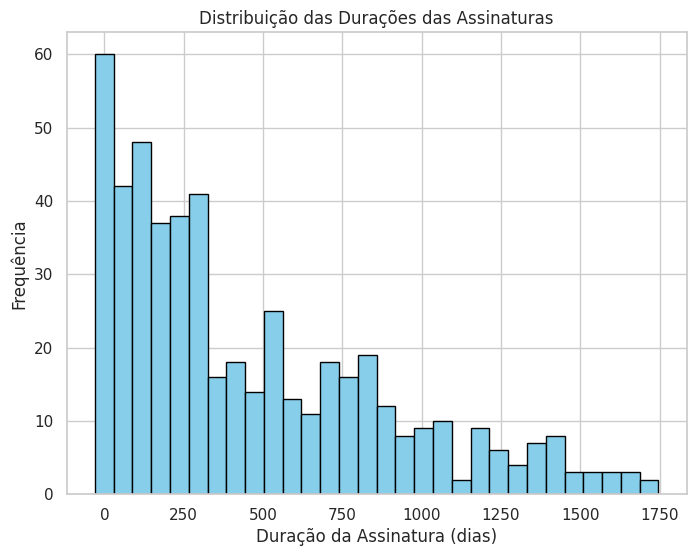

In [30]:
# Filtrando apenas assinaturas canceladas para plotar o histograma
assinaturas_canceladas = df.dropna(subset=['data_cancelamento'])

# Obtendo as durações das assinaturas em dias
durations = assinaturas_canceladas['duracao_assinatura'].dt.days

# Plotando o histograma
plt.figure(figsize=(8, 6))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Duração da Assinatura (dias)')
plt.ylabel('Frequência')
plt.title('Distribuição das Durações das Assinaturas')
plt.grid(True)
plt.show()


- **Pico de Frequência em dias: Há um pico na frequência das durações das assinaturas em torno de 456 dias, indicando que existe um grupo significativo de clientes que mantêm suas assinaturas por esse período específico antes de cancelá-las.**

Variação nas Durações:

- **Dispersão de durações: Além do pico em torno de 456 dias, o gráfico mostra uma dispersão de durações das assinaturas. Isso sugere que, embora haja um grupo central em torno de 456 dias, existem também assinaturas que variam em duração, indicando diferentes comportamentos de retenção entre os clientes.**

**Grafico de Barras para a Quantidade de assinantes na plataforma.**

/tmp/ipykernel_2205/864709962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, order=df[column].value_counts().index[::-1], palette='viridis')


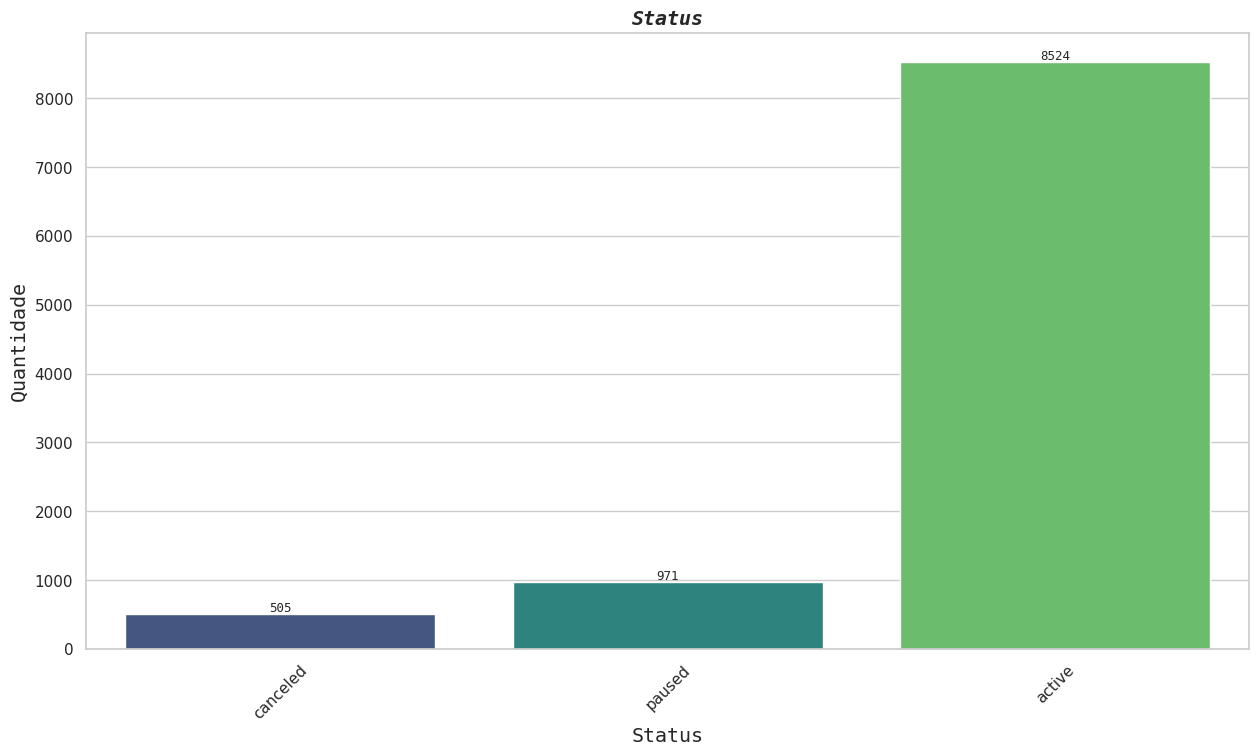

In [43]:

def create_count_plot(df, column='', title='', xlabel='', ylabel=''):
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index[::-1], palette='viridis')

    # Adiciona rótulos nas barras do gráfico
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=9, family='monospace')

    # Define rótulos e título do gráfico
    plt.xlabel(xlabel, fontsize='large', family='monospace')
    plt.ylabel(ylabel, fontsize='large', family='monospace')
    plt.title(title, fontsize='large', fontweight='bold', style='italic', family='monospace')

    # Ajusta os parâmetros dos ticks no eixo X para melhorar a legibilidade
    plt.xticks(rotation=45)
    
    plt.show()


create_count_plot(df, 'Status', 'Status', 'Status', 'Quantidade')



# Analise de Churn canais de Marketing

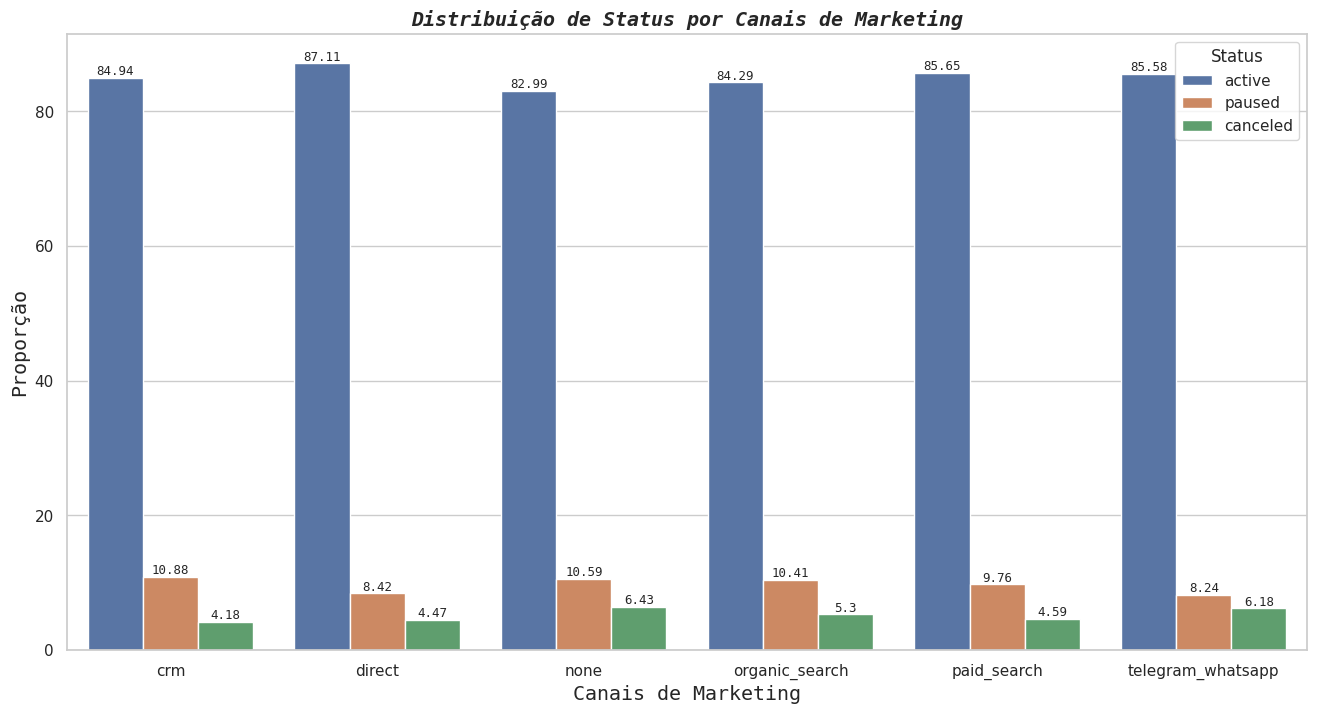

In [51]:


def create_bar_plot(df: pd.DataFrame, column: str, title: str, x_label: str) -> None:
    plt.figure(figsize=(16, 8))
   
    # Calcula a proporção de cada status por categoria
    prop_df = df.groupby(column)['Status'].value_counts(normalize=True).mul(100).round(2).rename('prop').reset_index()
   
    sns.barplot(data=prop_df, x=column, y='prop', hue='Status')
    plt.legend(title='Status')
   
    # Adiciona rótulos nas barras do gráfico
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=9, family='monospace')
   
    plt.xlabel(x_label, fontsize='large', family='monospace')
    plt.ylabel('Proporção', fontsize='large', family='monospace')
    plt.title(title, fontsize='large', fontweight='bold', style='italic', family='monospace')
    plt.show()


create_bar_plot(df, 'canal_marketing', 'Distribuição de Status por Canais de Marketing', 'Canais de Marketing')



### Relatório Analítico do Gráfico de Canais de Marketing.

 **Insights Obtidos:**

 - Os canais que possuem a porcentagem de clientes ativos podem ser consideradas como fontes eficazes para adquirir clientes que permaneceram ativos.

 - Os canais que possuem uma porcentagem considerável de clientes com status 'Pausado' ou 'Cancelado', indicam a necessidade de revisão das estratégias de marketing ou atendimento pós-venda para essas origens específicas.

 - Existem diferenças significativas na forma como os clientes respondem a diferentes origens de marketing devido as variações.É importante personalizar as estratégias de retenção e engajamento para cada origem de marketing. Isso significa que diferentes abordagens podem ser necessárias para manter ou envolver os clientes, dependendo de onde eles foram adquiridos.
 

/tmp/ipykernel_2205/1861934894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x, y=y, palette=colors)


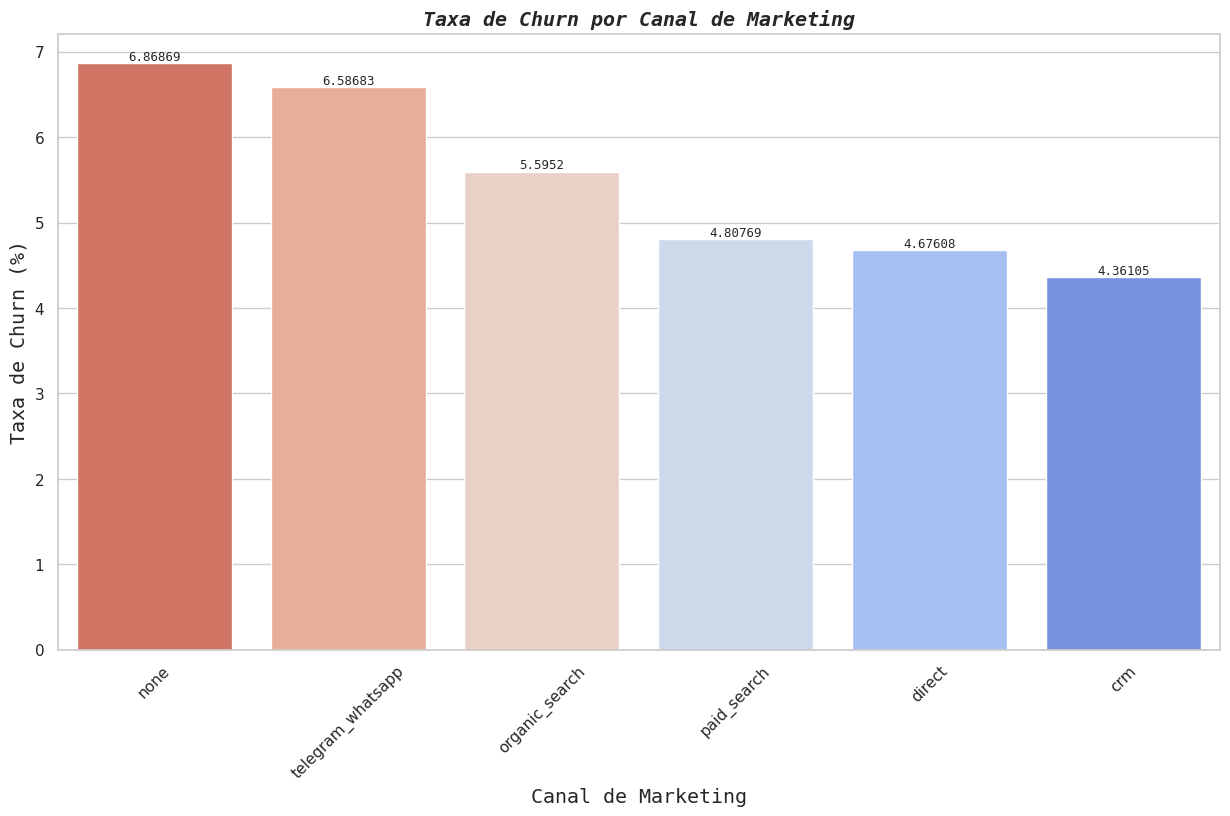

In [109]:
def create_bar_plot(df, x='', y='', title='', xlabel='', ylabel='', rot=45):
    _, ax = plt.subplots(figsize=(15, 8))
    sns.barplot(data=df, x=x, y=y, palette=colors)
    for value in ax.containers:
        ax.bar_label(value, label_type='edge', fontsize=9, family='monospace')
    ax.set_xlabel(xlabel, fontsize='large', family='monospace')
    ax.set_ylabel(ylabel, fontsize='large', family='monospace')
    ax.set_title(title, fontsize='large', fontweight='bold', style='italic', family='monospace')
    ax.set_xticks(np.arange(df[x].shape[0]))
    ax.set_xticklabels(df[x], rotation=rot)
    plt.show()

create_bar_plot(df_for_plot, x='Canal de Marketing', y='Taxa de Churn (%)', title='Taxa de Churn por Canal de Marketing', xlabel='Canal de Marketing', ylabel='Taxa de Churn (%)')


- **Marketing  ('none'): Apesar de ter uma quantidade relativamente menor de clientes ativos em comparação com alguns outros canais, tem uma taxa de churn relativamente alta. Isso sugere a necessidade de investigar e entender melhor o comportamento desses clientes ou as estratégias de retenção para esse grupo.**

- **Telegram e WhatsApp: Embora tenha uma taxa de churn menor que o 'none', a quantidade de clientes ativos é considerável, o que indica uma boa eficácia na retenção para esses canais.**

- **Organic_search :Com uma base sólida de clientes ativos, apresenta uma taxa de churn intermediária. Focar em estratégias para reduzir esse churn pode ser benéfico, considerando o tamanho da base.**

- **paid_search: Apesar de uma taxa de churn moderada, pode ser interessante investir em melhorias na retenção, especialmente considerando os custos associados à aquisição de clientes por meio desse canal.**

- **direct: Possui um número significativo de clientes ativos, mas uma taxa de churn considerável. Investigar e melhorar a experiência ou engajamento dos clientes provenientes desse canal pode ajudar a reduzir o churn.**

- **CRM: Com uma taxa de churn relativamente baixa, mas um número menor de clientes ativos, pode ser valioso explorar e expandir as estratégias de retenção bem-sucedidas utilizadas nesse canal para outras áreas ou canais de marketing.**

# Análise Churn Rate por Estado.

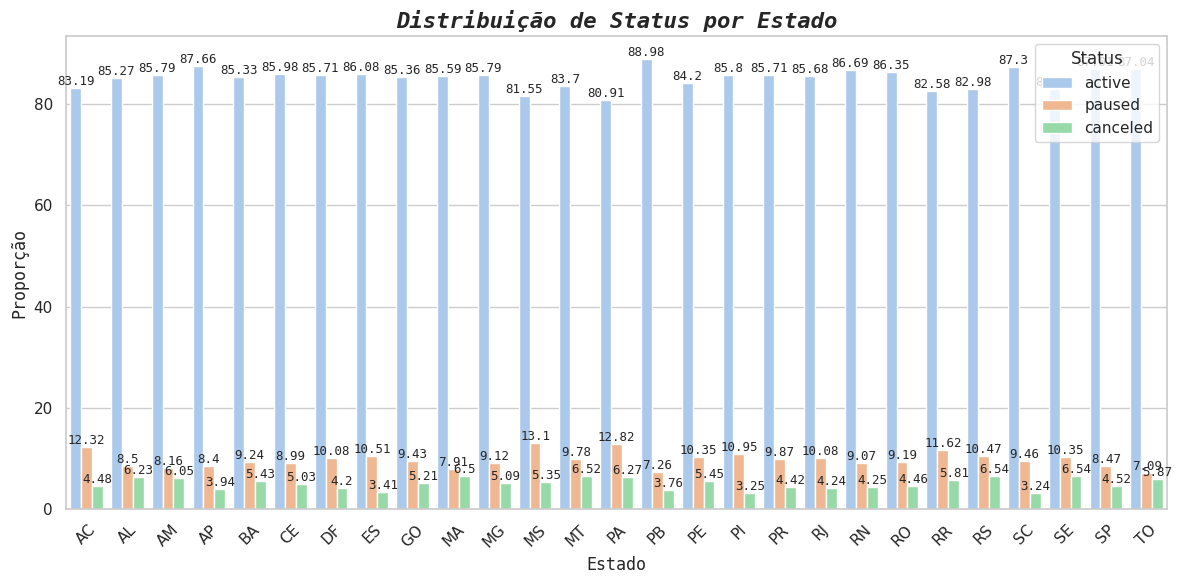

In [73]:
def create_bar_plot(df: pd.DataFrame, column: str, title: str, x_label: str) -> None:
    plt.figure(figsize=(12, 6))

    # Calcula a proporção de cada status por categoria
    prop_df = df.groupby(column)['Status'].value_counts(normalize=True).mul(100).round(2).rename('prop').reset_index()

    # Cria o gráfico de barras
    sns.barplot(data=prop_df, x=column, y='prop', hue='Status', palette='pastel')
    plt.legend(title='Status')

    # Adiciona rótulos nas barras do gráfico
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=9, family='monospace')

    # Personalizações
    plt.xlabel(x_label, fontsize=12, family='monospace')
    plt.ylabel('Proporção', fontsize=12, family='monospace')
    plt.title(title, fontsize=16, fontweight='bold', style='italic', family='monospace')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

create_bar_plot(df, 'Estado', 'Distribuição de Status por Estado', 'Estado')

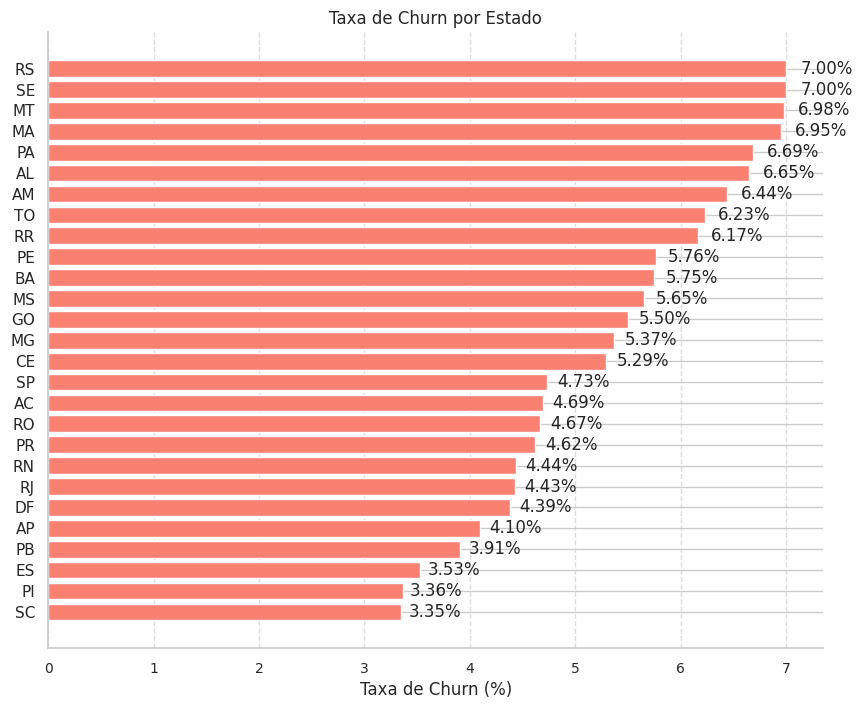

In [95]:

# Ordenar os dados
churn_sorted_by_state = churn_sorted_by_state.sort_values(by='churn_rate', ascending=True)

# Plotagem
plt.figure(figsize=(10, 8))  # Ajusta o tamanho da figura

# Criação do gráfico de barras horizontais com cores distintas
bars = plt.barh(churn_sorted_by_state.index, churn_sorted_by_state['churn_rate'], color='salmon')

# Adiciona as porcentagens nas barras com formatação adequada
for bar in bars:
    plt.text(bar.get_width() * 1.02, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}%', va='center', ha='left')

# Ajustes visuais
plt.xlabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Estado')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adiciona uma grade para melhorar a leitura
plt.xticks(fontsize=10)  # Ajusta o tamanho dos rótulos no eixo X
plt.gca().spines['top'].set_visible(False)  # Remove a borda superior
plt.gca().spines['right'].set_visible(False)  # Remove a borda direita

plt.show()





# Relatório Analítico do gráfico Taxa de churn por Estado.

- **RS, SE e MT têm as taxas de cancelamento mais altas, todas acima de 6.9%, indicando um potencial problema nessas regiões que pode exigir maior atenção ou estratégias para retenção de clientes.**

- **Percebe-se uma variação significativa nas taxas de churn entre os estados, indo de 3.3% a 7%. Isso pode indicar diferenças no comportamento do cliente, na qualidade do serviço oferecido ou até mesmo em condições socioeconômicas específicas de cada região.**

- **SC, PI e ES têm as taxas de churn mais baixas. Isso pode sugerir uma maior fidelidade dos clientes ou uma melhor experiência geral do cliente nesses locais.**

# Utilizando análise Temporal para entender como as taxas de Churn variam ao longo do tempo.

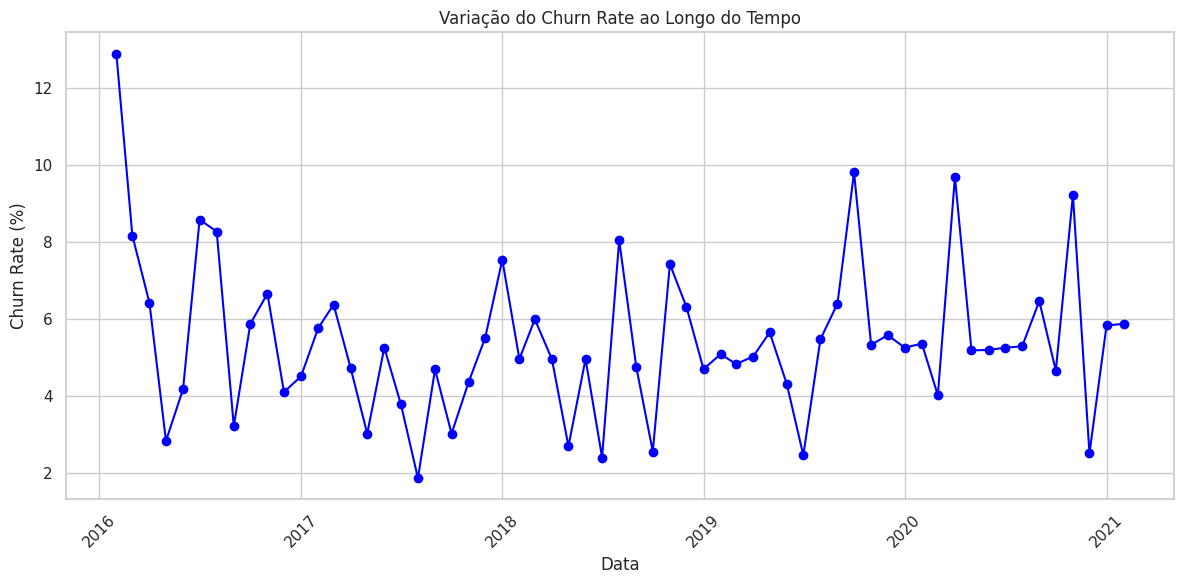

In [132]:
# Convertendo 'dt_ano_mes' para timestamps
df_churn['dt_ano_mes'] = df_churn['dt_ano_mes'].astype(str)  # Convertendo para string
df_churn['dt_ano_mes'] = pd.to_datetime(df_churn['dt_ano_mes'])  # Convertendo para timestamp

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df_churn['dt_ano_mes'], df_churn['churn_rate'], marker='o', linestyle='-', color='blue')

# Configurações do gráfico
plt.title('Variação do Churn Rate ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)  # Rótulos do eixo x rotacionados para melhor visualização

plt.grid(True)
plt.tight_layout()
plt.show()





**Observamos uma redução gradual no churn até atingir o ponto mais baixo registrado (01/01/2021), seguido de um aumento consistente que culminou no pico mais alto (01/02/2021).**

 # Análise Final dos dados

- **A estabilidade nos clientes ativos, bem como nas variações em cancelamentos e pausas, sugere uma relativa consistência na base de clientes, embora com variações mensais.**

- **Identificamos um pico em torno de 456 dias nas durações de assinaturas, sugerindo um grupo significativo de clientes mantendo suas assinaturas nesse período antes de cancelá-las. Há também uma dispersão em outras durações, indicando comportamentos variados de retenção.**

- **Observamos que diferentes canais de marketing têm impactos distintos nos comportamentos dos clientes. Alguns canais têm altas taxas de churn, enquanto outros apresentam maior eficácia na retenção.**

- **Identificamos diferenças marcantes nas taxas de churn entre estados, indicando possíveis disparidades no comportamento do cliente ou na qualidade dos serviços, sendo necessária uma abordagem personalizada por região.**

- **Observamos uma tendência de redução gradual do churn até atingir o ponto mais baixo, seguido por um aumento consistente, indicando flutuações temporais consideráveis.**

### Solução Sugerida


- **Compreender a distribuição das durações das assinaturas é fundamental para o desenvolvimento de estratégias de retenção de clientes. Focar em políticas de retenção específicas para os clientes que atingem ou estão próximos do ponto de cancelamento em torno de 456 dias pode ser uma área de interesse para aumentar a retenção.**

- **Para as origens de marketing com alto percentual de status 'Ativo', é viável considerar a otimização e aumento de investimento nessas campanhas, visando manter a boa performance.**

- **Realizar pesquisas, coletar feedbacks para tomar ações específicas.**

- **Manter os clientes informados sobre atualizações, melhorias ou novos recursos. Isso demonstrará cuidado e pode aumentar o valor percebido do serviço.**

- **Treinar equipes para lidar com questões e preocupações dos clientes, oferecendo um suporte eficiente e útil.**

- **Realizar análises periódicas para monitorar as mudanças nos status por origem de marketing e fazer ajustes nas estratégias de acordo com as mudanças de comportamento dos cliente.**

